In [1]:

import rtree, pygeos
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import os
import folium

import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import statsmodels.api as sm

C:\Anaconda3\envs\geo37\lib\site-packages\geopandas\_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
#os.listdir('/dbfs/FileStore/mike.hudgell@os.uk/')

data_path = 'C:/Users/mhudgell/data/'
os.listdir(data_path)

['dft-road-casualty-statistics-accident-last-5-years.csv',
 'dft-road-casualty-statistics-casualty-last-5-years.csv',
 'dft-road-casualty-statistics-vehicle-last-5-years.csv',
 'OS VectorMap District (ESRI Shape File) SU',
 'PFA_DEC_2021_EW_BGC.cpg',
 'PFA_DEC_2021_EW_BGC.dbf',
 'PFA_DEC_2021_EW_BGC.prj',
 'PFA_DEC_2021_EW_BGC.shp',
 'PFA_DEC_2021_EW_BGC.shx',
 'Police_Force_Areas_(December_2021)_EW_BGC.xml']

In [3]:
file_path = data_path +'dft-road-casualty-statistics-accident-last-5-years.csv'
print(file_path)
rta = pd.read_csv(file_path)

C:/Users/mhudgell/data/dft-road-casualty-statistics-accident-last-5-years.csv


C:\Users\mhudgell\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
rta.head(2)

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2016010000005,2016,010000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,...,0,5,1,1,0,0,1,1,2,E01000543
1,2016010000006,2016,010000006,551920.0,174560.0,0.184928,51.449595,1,3,1,...,0,4,1,1,0,0,1,1,2,E01000375


In [5]:
geometry = [Point(xy) for xy in zip(rta.location_easting_osgr, rta.location_northing_osgr)]
crs = {'init': 'epsg:27700'} #4326
rta_gdf = gpd.GeoDataFrame(rta, crs=crs, geometry=geometry)

C:\Anaconda3\envs\geo37\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

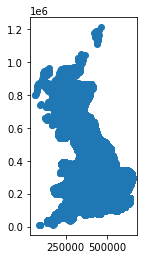

In [6]:
rta_gdf.plot()

In [7]:
police_areas_gdf = gpd.read_file(data_path + 'PFA_DEC_2021_EW_BGC.shp')

<AxesSubplot:>

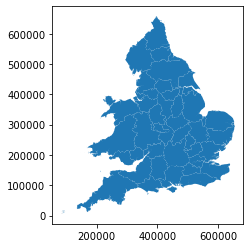

In [8]:
police_areas_gdf.plot()

In [9]:
sussex_poly = police_areas_gdf.loc[police_areas_gdf['PFA21NM'] == 'Sussex'] #.geometry

<AxesSubplot:>

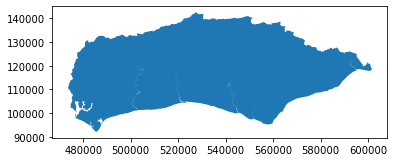

In [10]:
sussex_poly.plot()

In [11]:
rta_gdf

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,geometry
0,2016010000005,2016,010000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,...,5,1,1,0,0,1,1,2,E01000543,POINT (519310.000 188730.000)
1,2016010000006,2016,010000006,551920.0,174560.0,0.184928,51.449595,1,3,1,...,4,1,1,0,0,1,1,2,E01000375,POINT (551920.000 174560.000)
2,2016010000008,2016,010000008,505930.0,183850.0,-0.473837,51.543563,1,3,1,...,4,1,1,0,0,1,1,2,E01033725,POINT (505930.000 183850.000)
3,2016010000016,2016,010000016,527770.0,168930.0,-0.164442,51.404958,1,3,1,...,1,1,1,0,0,1,1,2,E01003379,POINT (527770.000 168930.000)
4,2016010000018,2016,010000018,510740.0,177230.0,-0.406580,51.483139,1,3,2,...,1,1,1,0,0,1,1,2,E01002583,POINT (510740.000 177230.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597968,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,1,1,1,0,0,1,1,-1,-1,POINT (343034.000 731654.000)
597969,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,1,1,1,0,0,1,2,-1,-1,POINT (257963.000 658891.000)
597970,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,1,1,1,0,0,2,1,-1,-1,POINT (383664.000 810646.000)
597971,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,1,1,1,0,0,1,2,-1,-1,POINT (277161.000 674852.000)


In [12]:
sussex_poly

,OBJECTID,PFA21CD,PFA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,SHAPE_Leng,SHAPE_Area,geometry
32,33,E23000033,Sussex,556570,117296,0.226848,50.933861,{2A204699-2B56-42AD-B396-7F535D40D5FB},711999.620282,3.786718e+09,"MULTIPOLYGON (((483325.407 94764.633, 483268.2..."


In [13]:

sussex_rta = gpd.sjoin(rta_gdf, sussex_poly, how="inner")

<AxesSubplot:>

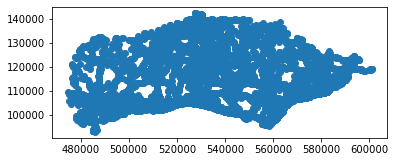

In [14]:
sussex_rta.plot()

In [15]:
sussex_rta.head(1)

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,OBJECTID,PFA21CD,PFA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,SHAPE_Leng,SHAPE_Area
108207,2016471600009,2016,471600009,510617.0,102999.0,-0.431144,50.815918,47,3,3,...,33,E23000033,Sussex,556570,117296,0.226848,50.933861,{2A204699-2B56-42AD-B396-7F535D40D5FB},711999.620282,3.786718e+09


In [16]:
#sussex_rta = rta_gdf

In [17]:
sussex_rta.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,...,did_police_officer_attend_scene_of_accident,trunk_road_flag,index_right,OBJECTID,BNG_E,BNG_N,LONG,LAT,SHAPE_Leng,SHAPE_Area
count,18991.000000,18991.000000,18991.000000,18991.000000,18991.000000,18991.000000,18991.000000,18991.000000,18991.00000,18991.000000,...,18991.000000,18991.000000,18991.0,18991.0,18991.0,18991.0,1.899100e+04,18991.000000,1.899100e+04,1.899100e+04
mean,2017.894845,532337.232005,113084.936022,-0.119320,50.901471,46.999947,2.742615,1.903165,1.31020,4.104629,...,1.255911,1.896899,32.0,33.0,556570.0,117296.0,2.268480e-01,50.933861,7.119996e+05,3.786718e+09
std,1.389326,26128.888034,12000.760736,0.371476,0.107758,0.007256,0.463968,0.742132,0.72289,1.916546,...,0.436383,0.304099,0.0,0.0,0.0,0.0,5.551261e-17,0.000000,6.333160e-08,1.167328e-03
min,2016.000000,474542.000000,92829.000000,-0.941778,50.728749,46.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,32.0,33.0,556570.0,117296.0,2.268480e-01,50.933861,7.119996e+05,3.786718e+09
25%,2017.000000,515502.000000,104353.500000,-0.359239,50.824784,47.000000,3.000000,1.000000,1.00000,2.000000,...,1.000000,2.000000,32.0,33.0,556570.0,117296.0,2.268480e-01,50.933861,7.119996e+05,3.786718e+09
50%,2018.000000,530143.000000,107882.000000,-0.150394,50.852626,47.000000,3.000000,2.000000,1.00000,4.000000,...,1.000000,2.000000,32.0,33.0,556570.0,117296.0,2.268480e-01,50.933861,7.119996e+05,3.786718e+09
75%,2019.000000,550442.000000,121358.500000,0.139809,50.973178,47.000000,3.000000,2.000000,1.00000,6.000000,...,2.000000,2.000000,32.0,33.0,556570.0,117296.0,2.268480e-01,50.933861,7.119996e+05,3.786718e+09
max,2020.000000,601302.000000,142472.000000,0.863607,51.167286,47.000000,3.000000,14.000000,12.00000,7.000000,...,2.000000,2.000000,32.0,33.0,556570.0,117296.0,2.268480e-01,50.933861,7.119996e+05,3.786718e+09


In [18]:



sussex_rta['date_time'] = sussex_rta['date'] + " " + sussex_rta['time']
sussex_rta['date_time'] = sussex_rta['date_time'] = pd.to_datetime(sussex_rta['date_time'], format="%d/%m/%Y %H:%M")
sussex_rta['ddate'] = sussex_rta['date_time'].dt.date
sussex_rta['year'] = sussex_rta['date_time'].dt.year
sussex_rta['day_of_week'] = sussex_rta['date_time'].dt.day_of_week
sussex_rta['month'] = sussex_rta['date_time'].dt.month
sussex_rta['hour'] = sussex_rta['date_time'].dt.hour
sussex_rta['minute'] = sussex_rta['date_time'].dt.minute
sussex_rta['day_of_year'] = sussex_rta['date_time'].dt.day_of_year
sussex_rta['week_number'] = sussex_rta['date_time'].dt.week
sussex_rta['time'] = sussex_rta['date_time'].dt.time
sussex_rta['number_of_vehicles'] = sussex_rta['number_of_vehicles'].astype(int)
sussex_rta['number_of_casualties'] = sussex_rta['number_of_casualties'].astype(int)

sussex_rta['year_no'] = sussex_rta['year'].astype('string')
sussex_rta['day_no'] = sussex_rta['day_of_year']
sussex_rta['day_no'] = (sussex_rta['day_no']).apply('{:0>3}'.format)
sussex_rta['timeline_string'] = sussex_rta['year_no'] + sussex_rta['day_no']
sussex_rta['timeline'] = sussex_rta['timeline_string'].astype(int)

C:\Users\mhudgell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # Remove the CWD from sys.path while we load stuff.


In [19]:
sussex_rta

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,year,month,hour,minute,day_of_year,week_number,year_no,day_no,timeline_string,timeline
108207,2016471600009,2016,471600009,510617.0,102999.0,-0.431144,50.815918,47,3,3,...,2016,1,15,46,1,53,2016,001,2016001,2016001
108208,2016471600013,2016,471600013,530194.0,104435.0,-0.152876,50.824758,47,2,2,...,2016,1,21,50,1,53,2016,001,2016001,2016001
108209,2016471600027,2016,471600027,561280.0,98915.0,0.285727,50.767339,47,3,1,...,2016,1,16,43,2,53,2016,002,2016002,2016002
108210,2016471600031,2016,471600031,521152.0,118158.0,-0.276645,50.950069,47,2,1,...,2016,1,23,4,2,53,2016,002,2016002,2016002
108211,2016471600034,2016,471600034,548114.0,114306.0,0.105377,50.909161,47,3,1,...,2016,1,17,35,3,53,2016,003,2016003,2016003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583677,2020471011403,2020,471011403,494140.0,100877.0,-0.665495,50.799808,47,3,2,...,2020,12,14,12,357,52,2020,357,2020357,2020357
583678,2020471011640,2020,471011640,528425.0,105812.0,-0.177483,50.837591,47,3,2,...,2020,12,18,15,365,53,2020,365,2020365,2020365
583679,2020471013388,2020,471013388,486352.0,104932.0,-0.775027,50.837476,47,3,2,...,2020,12,15,0,356,52,2020,356,2020356,2020356
583680,2020471015947,2020,471015947,512557.0,107575.0,-0.402197,50.856738,47,3,2,...,2020,11,9,27,330,48,2020,330,2020330,2020330


In [24]:

analysis_rta_df = sussex_rta.groupby(['ddate'], as_index=False)['number_of_casualties'].count()
analysis_rta_df.set_index(['ddate']) 
analysis_rta_df.sort_values(by=['ddate'])

,ddate,number_of_casualties
0,2016-01-01,3
1,2016-01-02,2
2,2016-01-03,4
3,2016-01-04,6
4,2016-01-05,10
...,...,...
1820,2020-12-27,6
1821,2020-12-28,4
1822,2020-12-29,3
1823,2020-12-30,6


array([[<AxesSubplot:title={'center':'number_of_casualties'}>]],
      dtype=object)

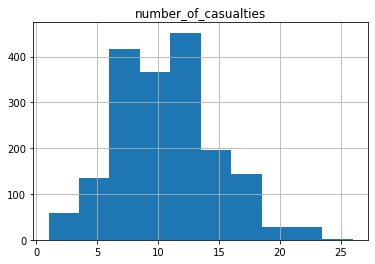

In [26]:
analysis_rta_df.hist()

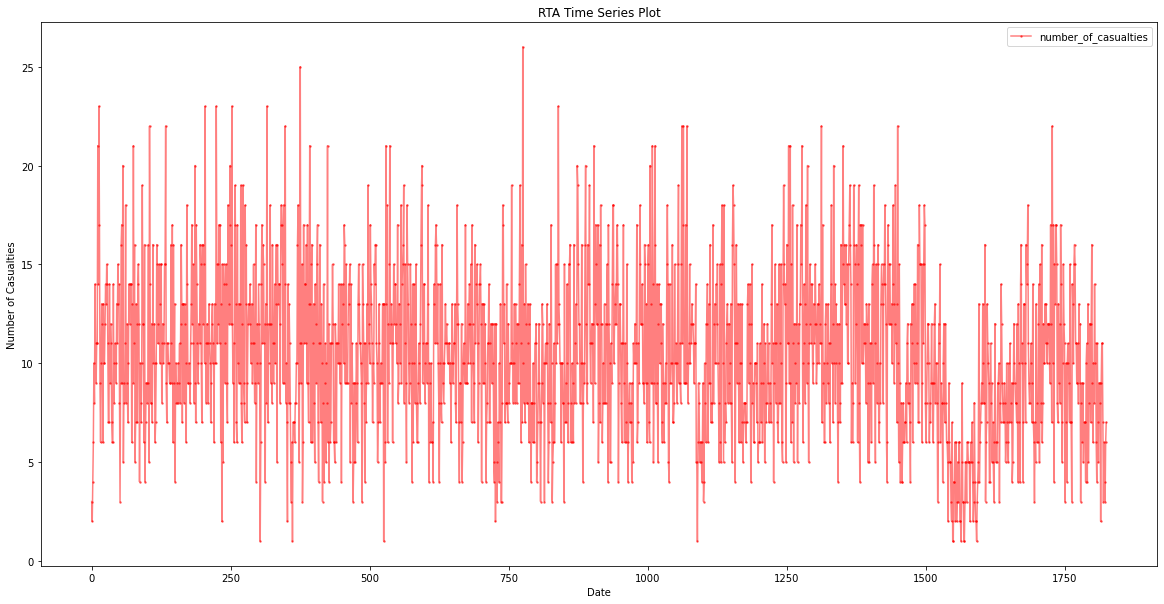

In [36]:
import plotly.express as px 
fig, ax = plt.subplots(figsize=(20, 10))

analysis_rta_df[["ddate", "number_of_casualties"]].plot(ax=ax, alpha=0.5, color='red', marker=".", markersize=3)
plt.xlabel("Date")
plt.ylabel("Number of Casualties")
plt.title("RTA Time Series Plot")

plt.show()

In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(analysis_rta_df['number_of_casualties'],
                order=(1,1,0),seasonal_order=(0,1,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                 number_of_casualties   No. Observations:                 1825
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood               -5348.288
Date:                              Tue, 25 Oct 2022   AIC                          10702.576
Time:                                      10:29:55   BIC                          10719.083
Sample:                                           0   HQIC                         10708.667
                                             - 1825                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4519      0.020    -22.819      0.000      -0.491      -0.413
ma.S.L12      -0.9992      0.117     -8.566      0.000      -1.228      -0.771
sigma2        20.7519      2.473      8.390      0.000      15.904      25.599
===================================================================================
Ljung-Box (L1) (Q):                  36.25   Jarque-Bera (JB):                11.69
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

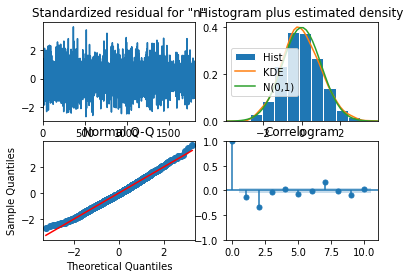

In [43]:
results.plot_diagnostics()
plt.show()

In [45]:
forecast_object = results.get_forecast(steps=100)
mean = forecast_object.predicted_mean
conf_int = forecast_object.conf_int()
dates = mean.index

In [46]:
dates

RangeIndex(start=1825, stop=1925, step=1)

In [47]:
conf_int

,lower number_of_casualties,upper number_of_casualties
1825,-2.569465,15.339503
1826,-3.814610,16.607797
1827,-4.935237,19.531049
1828,-6.972251,20.199715
1829,-8.147637,21.789785
...,...,...
1920,-55.117056,69.042898
1921,-55.715554,69.123465
1922,-56.199812,69.309093
1923,-55.560191,70.617515


In [48]:
dates

RangeIndex(start=1825, stop=1925, step=1)

In [1]:
forecast_object

NameError: name 'forecast_object' is not defined